In [36]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2

In [37]:
#utility function rgb to hex to reduce memory consumtion 
def rgb2hex(rgb):
  hex="#{:02x}{:02x}{:02x}".format(int(rgb[0]),int(rgb[1]),int(rgb[2]))
  return hex
print(rgb2hex([125,254,226]))

#7dfee2


In [105]:
def plot_image_info(path,k=6):
  #load image
  img_bgr=cv2.imread(path)
  img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

  #resize image to speed up processing time
  resized_img_rgb=cv2.resize(img_rgb,(64,64),interpolation=cv2.INTER_AREA)

  #reshape the image to be list of pixels
  img_list=resized_img_rgb.reshape((resized_img_rgb.shape[0]*resized_img_rgb.shape[1],3))

  #cluster the pixel and assign labels
  clt=KMeans(n_clusters=k)
  labels=clt.fit_predict(img_list)

  #count labels to find most popular
  label_count=Counter(labels)
  total_count=sum(label_count.values())

  #subset out most popular centroid
  center_colors = list(clt.cluster_centers_)
  ordered_colors=[center_colors[i]/255 for i in label_count.keys()]
  color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_count.keys() ]
  
  #print(color_labels)
  #print (label_count.keys())
  #print(ordered_colors)
  #print(center_colors)
  
  #plots image
  plt.figure(figsize=(14,8))
  plt.subplot(211)
  plt.imshow(img_rgb)
  plt.axis("off")

  #plot pie chart
  plt.subplot(212)
  plt.pie(label_count.values(),labels=color_labels, colors=ordered_colors, startangle=90)
  plt.axis("equal")
  plt.show()

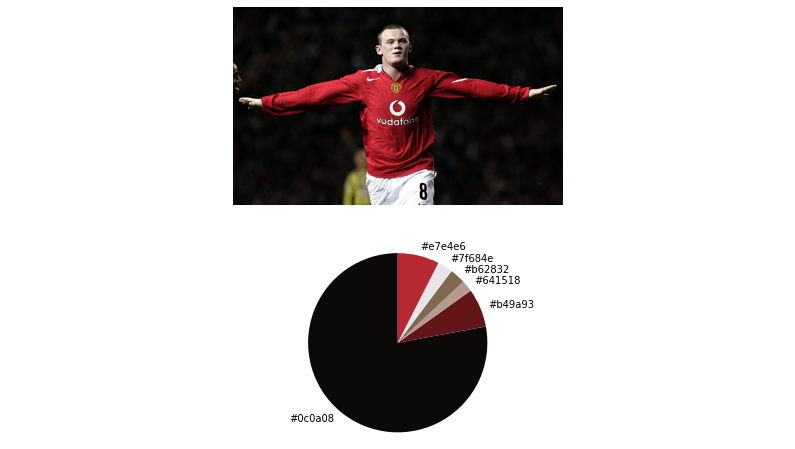

In [106]:
plot_image_info("/content/waynerooney.jpg")